In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import os
file_path='ironman.jpg'

Task 1: Image Loading
Using OpenCV

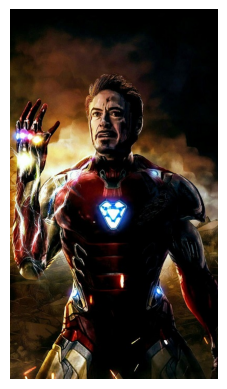

In [2]:
def load_image_opencv(file_path):
    image=cv2.imread(file_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image
image= load_image_opencv(file_path)

def show_image(image,s=None):
    plt.imshow(image,cmap=s)
    plt.axis('off')
    plt.show()
show_image(image)

Using PIL

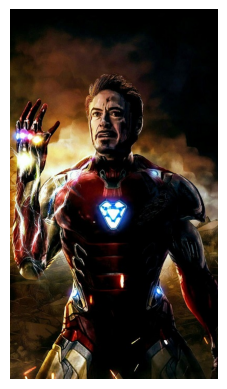

In [3]:
def load_image_pil(file_path):
    image=Image.open(file_path)
    image=np.array(image)
    return image

image=load_image_pil(file_path)
show_image(image)

Using PyTorch

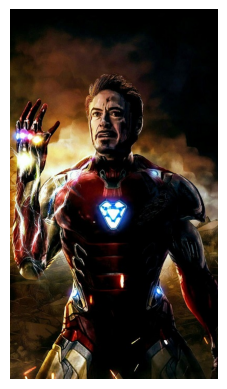

In [4]:
def load_image_pytorch(file_path):
    image=Image.open(file_path)
    transform=transforms.ToTensor()
    image=transform(image)
    return image
image=load_image_pytorch(file_path)

def show_image_pytorch(image):
    image=image.permute(1,2,0)
    image=np.array(image)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
show_image_pytorch(image)

Task 2: Printing Channels

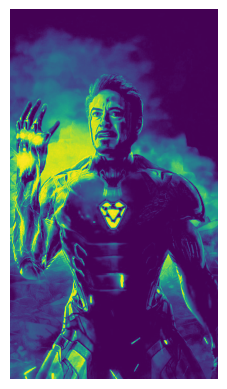

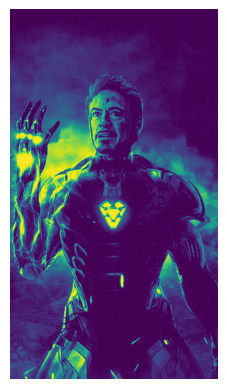

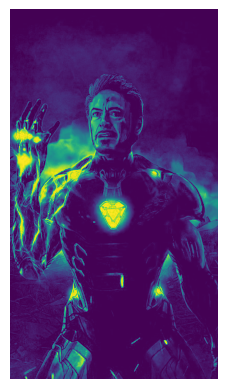

In [5]:
image=load_image_opencv(file_path)

r,g,b=cv2.split(image)
show_image(r)
show_image(g)
show_image(b)

Task 3: Slicing images

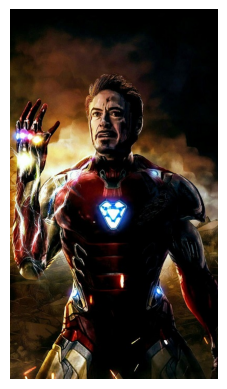

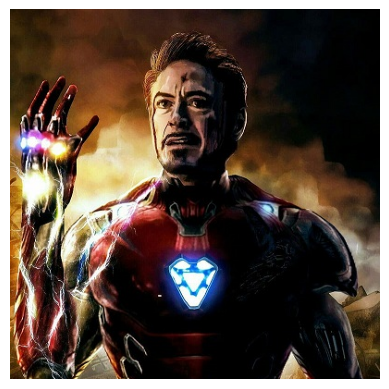

In [6]:
image=load_image_opencv(file_path)
show_image(image)
show_image(image[100:500,0:400])

Task 4 : Applying Filters

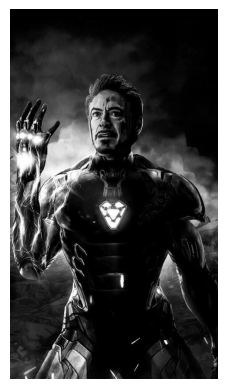

In [7]:
image=load_image_opencv(file_path)
bwimage=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
show_image(bwimage,'gray')

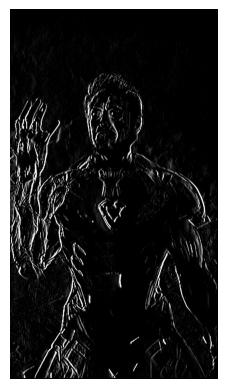

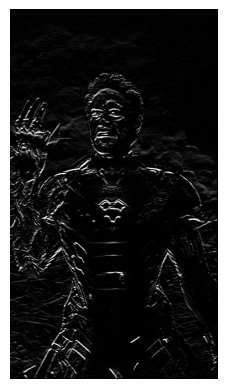

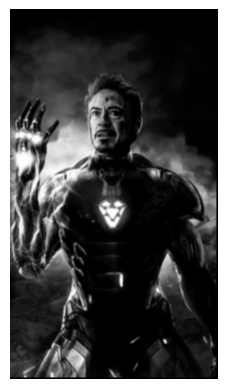

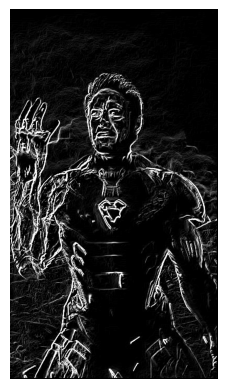

In [8]:
def apply_filter(image,filter):
    imy,imx=image.shape
    kery,kerx=len(filter),len(filter[0])
    filtered_img=np.zeros((imy,imx))
    for i in range(0,imy-kery+1):
        for j in range(0,imx-kerx+1):
            pxl_val=0
            for k in range(0,kery):
                for l in range(0,kerx):
                    pxl_val+=image[i+k,j+l]*filter[k][l]
            filtered_img[i,j]=pxl_val
    filtered_img=np.clip(filtered_img,0,255)
    return filtered_img
def sobel_filter(image):
    sobel_x = [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]
    sobel_y = [
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ]
    filtered_img_y=apply_filter(image,sobel_y)
    filtered_img_x=apply_filter(image,sobel_x)
    filtered_image = np.sqrt(filtered_img_x**2 + filtered_img_y**2)
    filtered_image = np.clip(filtered_image, 0, 255)
    return filtered_image
bwimage=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
vertical_filter=[
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ]
horizontal_filter = [
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ]

mean_filter = [[1/16 for i in range(4)] for j in range(4)]
vertical_filtered_image = apply_filter(bwimage,vertical_filter)
horizontal_filtered_image = apply_filter(bwimage,horizontal_filter)
mean_filtered_image = apply_filter(bwimage,mean_filter)
sobel_filtered_image = sobel_filter(bwimage)
show_image(vertical_filtered_image,'gray')
show_image(horizontal_filtered_image,'gray')
show_image(mean_filtered_image,'gray')
show_image(sobel_filtered_image,'gray')

Task 5: Save Image

Using OpenCV

In [9]:
output_folder = 'output_img'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
cv2.imwrite(os.path.join(output_folder, 'sobel.jpg'), sobel_filtered_image)

True

Using PIL

In [10]:
image_pil = Image.fromarray(image)
output_folder = 'output_img'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
image_pil = Image.fromarray(sobel_filtered_image)
image_pil = image_pil.convert('L')
image_pil.save(os.path.join(output_folder, 'sobel.jpg'))
